<a href="https://colab.research.google.com/github/thivagar-manickam/data-science-notebooks/blob/main/Iris%20Data%20Set/Iris_Data_Set_Logistic_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data import and Cleaning

In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data['feature_names'])
df['target'] = data['target']

df['target'] = df['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [26]:
# checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

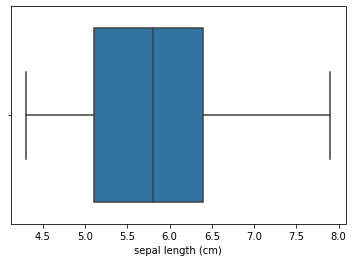

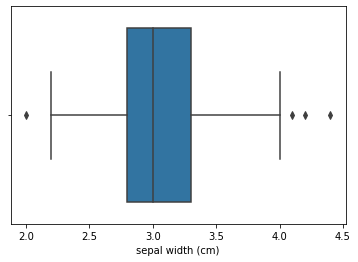

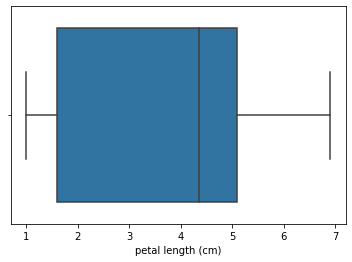

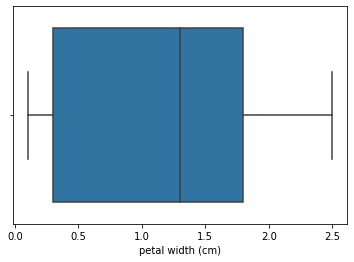

In [27]:
# separating the numberic to check if outliers is there
num_data = df.drop(['target'], axis=1)
for col in num_data.columns:
  sns.boxplot(num_data[col])
  plt.show()

In [28]:
df.shape

(150, 5)

In [29]:
# remove the outlier from the Sepal width column

upper_bound = df['sepal width (cm)'].quantile(0.75)
lower_bound = df['sepal width (cm)'].quantile(0.25)

IQR = upper_bound - lower_bound

upper_whisker = upper_bound + (1.5 * IQR)
lower_whisker = lower_bound - (1.5 * IQR)

clean_df = df[~((df['sepal width (cm)'] > upper_whisker) | (df['sepal width (cm)'] < lower_whisker))]

In [30]:
# To reset the 
clean_df = clean_df.reset_index(drop=True)

# Checking for the multi collinearity condition within the dataset

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
num_data = clean_df.select_dtypes(include=np.number)

for i, col in enumerate(num_data):
  print(col,'-', variance_inflation_factor(num_data.values, i))

sepal length (cm) - 269.1952446934319
sepal width (cm) - 99.379327551994
petal length (cm) - 175.15587741066858
petal width (cm) - 56.1753857986753


In [32]:
num_data.drop('sepal length (cm)', axis=1, inplace=True)

In [33]:
for i, col in enumerate(num_data):
  print(col,'-', variance_inflation_factor(num_data.values, i))

sepal width (cm) - 6.1160774529554205
petal length (cm) - 63.09684711443592
petal width (cm) - 43.74787962094055


In [34]:
num_data.drop('petal length (cm)', axis=1, inplace=True)

In [35]:
for i, col in enumerate(num_data):
  print(col,'-', variance_inflation_factor(num_data.values, i))

sepal width (cm) - 3.0455303306699877
petal width (cm) - 3.0455303306699877


Based on the VIF factor with threshold of 5, we have removed the sepal length and petal length params, which brought rest of the two paramers value to less
than 5

In [36]:
# We will now remove the Sepal length and Petal length from the clean_df
clean_df.drop(['sepal length (cm)', 'petal length (cm)'], axis=1, inplace=True)
clean_df.head(2)

,sepal width (cm),petal width (cm),target
0,3.5,0.2,setosa
1,3.0,0.2,setosa


### Building the Logistic regression model for the Iris Dataset

In [37]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
encoder = LabelEncoder()
clean_df['target'] = encoder.fit_transform(clean_df['target'])

In [39]:
X = clean_df.drop(['target'], axis = 1)
y = clean_df['target']

In [40]:
# split the data into training and test data

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state = 10)

In [41]:
# Training the model

logistic_model = LogisticRegression()
logistic_model.fit(Xtrain, Ytrain)

LogisticRegression()

In [42]:
# Getting the predicted class and probability

y_pred = logistic_model.predict(Xtest) # this will give us the class labels directly
y_pred_prob = logistic_model.predict_proba(Xtest) # this will give us the probablity

### Checking for the Accuracy and performance metrics

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [44]:
# Accuracy of the model
accuracy = accuracy_score(Ytest, y_pred)
print(f"Accuracy of the Logistic model is: {round(accuracy * 100, 2)}")

Accuracy of the Logistic model is: 93.18


In [45]:
# Accuracy of the model for threshold values from 0.1 to 1.0

for i in np.linspace(0, 1, 11):
  y_class = []
  for row in y_pred_prob:
    for index, value in enumerate(row):
      if value >= i and index == 0:
        y_class.append(0)
        break;
      elif value >= i and index == 1:
        y_class.append(1)
        break;
      else:
        y_class.append(2)
        break;
  accuracy = accuracy_score(Ytest, y_class) * 100
  print(f"Threshold value: {i}")
  print(f"Accuracy of the model: {round(accuracy, 3)}\n")

Threshold value: 0.0
Accuracy of the model: 27.273

Threshold value: 0.1
Accuracy of the model: 61.364

Threshold value: 0.2
Accuracy of the model: 61.364

Threshold value: 0.30000000000000004
Accuracy of the model: 61.364

Threshold value: 0.4
Accuracy of the model: 59.091

Threshold value: 0.5
Accuracy of the model: 59.091

Threshold value: 0.6000000000000001
Accuracy of the model: 59.091

Threshold value: 0.7000000000000001
Accuracy of the model: 59.091

Threshold value: 0.8
Accuracy of the model: 59.091

Threshold value: 0.9
Accuracy of the model: 45.455

Threshold value: 1.0
Accuracy of the model: 34.091

